In [10]:
import numpy as np
import csv
import matplotlib.pyplot as plt

#Grid point characteristics

class Grid_point:
    def __init__(self, r, theta, phi, beam, g):
        self.r = r
        self.theta = theta
        self.phi = phi
        self.beam = beam
        self.g = g

class Microphone:
    def __init__(self, r, theta, phi):
        self.r = r
        self.theta = theta
        self.phi = phi

#Calculate the steering vectors 

def get_steering_vector(scan_r, scan_theta, scan_phi):
    g = []
    for i in range(len(m)):
        dist = np.sqrt((scan_r*np.sin(scan_phi*np.pi/180))**2 +
                    (scan_r*np.cos(scan_phi*np.pi/180)*np.cos(scan_theta*np.pi/180) - m[i].r*np.cos(m[i].theta*np.pi/180))**2 +
                    (scan_r*np.cos(scan_phi*np.pi/180)*np.sin(scan_theta*np.pi/180) - m[i].r*np.sin(m[i].theta*np.pi/180))**2)
        z = np.exp(-(2*np.pi*F*dist*complex(0+1j)/C))/dist
        g.append(z)
    g = np.array(g)
    return g

#Main program

#Read pressure measurements

p = [] 

with open("D:\carti2022\Python\ANWB.csv", newline='') as drone_file:
    reader = csv.reader(drone_file)
    for row in reader:
        if len(row[0])==0:
            break
        aux = []
        for i in range(len(row)):
            if i!=0 and i!=16 and i!=20 and i!=40 and i<62:
                aux.append(float(row[i]))
        p.append(aux)

p = np.array(p) #Columns (p) are p measurements for the same microphone and diff time instances
          #and rows (p[i]) are for same time instance and different microphones

#Read microphone coordinates

m = [] #Microphone coordinates (r, theta, phi) wrt the center of the array

with open("D:\carti2022\Python\config.txt") as m_file:
    for line in m_file:
        words = line.split()
        if words[0]!="1" and words[0]!="17" and words[0]!="21" and words[0]!="41" and words[0]!="63" and words[0]!="64":
            x = float(words[1])
            y = float(words[2])
            r = np.sqrt(x**2 + y**2)
            theta = np.arctan2(y, x)
            theta = theta if theta>=0 else theta + 2*np.pi
            microphone = Microphone(r, theta*180/np.pi, 0)
            m.append(microphone)


In [11]:
#Construct the grid
grid = []

dtheta = 1
dphi = 0.5
phi = 0
r = 80

while phi < 90:
    theta = 0
    while theta < 360:
        grid_point = Grid_point(r, theta, phi, 0, [])
        grid.append(grid_point)
        theta += dtheta
    phi += dphi


In [12]:
#Prepare the plot
    
x_axis = [] #Horizontal axis is theta
y_axis = [] #Vertical axis is phi

theta = 0
while theta < 360:
    x_axis.append(theta)
    theta += dtheta

x_axis.append(360)

phi = 0
while phi < 90:
    y_axis.append(phi)
    phi += dphi
y_axis.append(90)

X,Y = np.meshgrid(x_axis, y_axis)


In [13]:
#Construct the steering vectors

#Define constants
C = 343 #m/s - speed of sound
F = 800 #Hz - frequency needed for the steering vectors and fft

fs = 50000
wind = 4096 #window size
df = (fs/2)/(wind/2)

n = round(F/df) 

#Calculate the steering vectors for each grid point

for i in range(len(grid)):
    grid[i].g = get_steering_vector(grid[i].r, grid[i].theta, grid[i].phi)



C:\Users\grig_\AppData\Local\Temp\ipykernel_13388\743670383.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  beam_map[j][k] = grid[index].beam


At time instant 0.0: o = 292, f = 34.0.


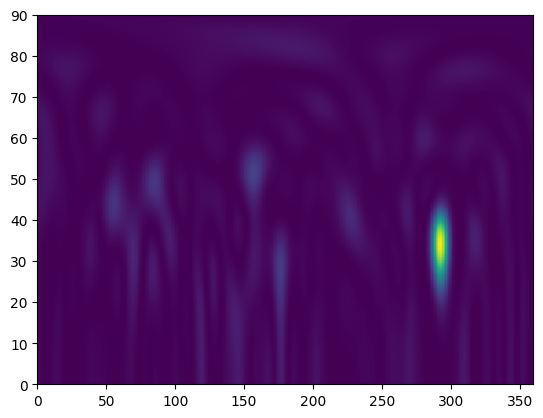

At time instant 0.04096: o = 292, f = 34.5.


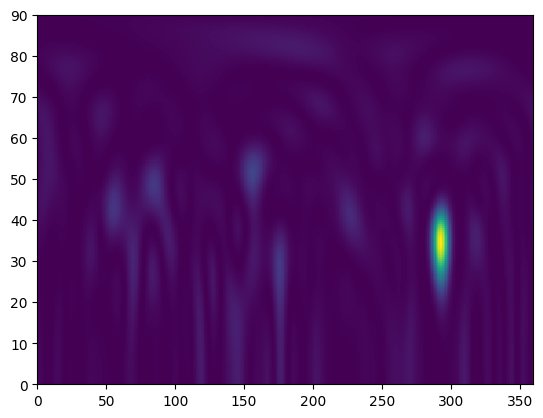

At time instant 0.08192: o = 293, f = 34.5.


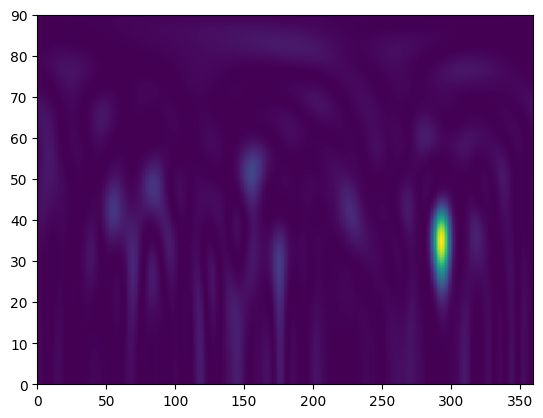

At time instant 0.12288: o = 293, f = 35.0.


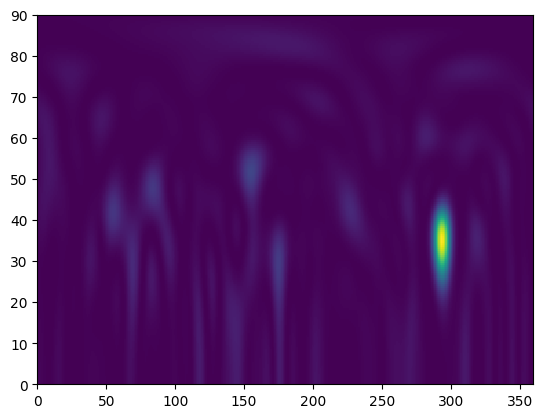

At time instant 0.16384: o = 294, f = 35.0.


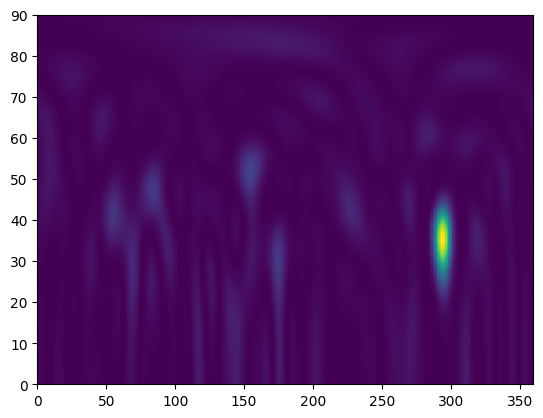

At time instant 0.2048: o = 294, f = 35.5.


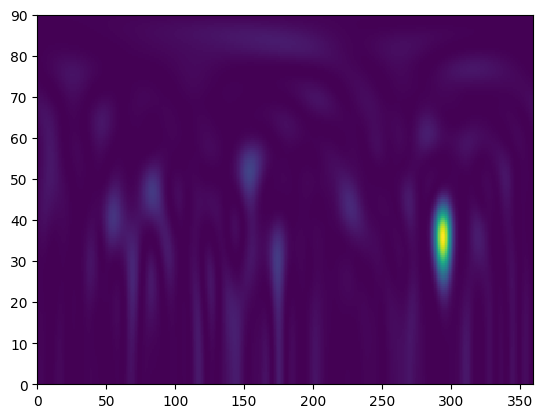

At time instant 0.24576: o = 294, f = 36.5.


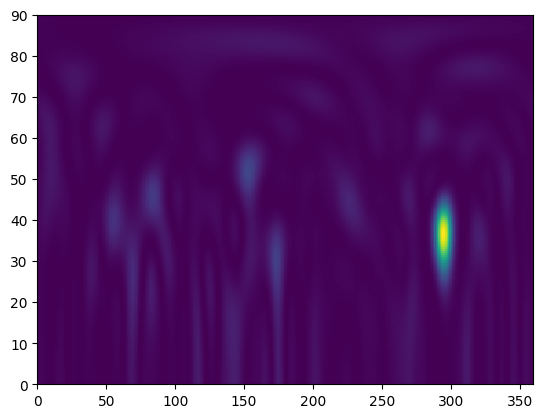

At time instant 0.28672: o = 295, f = 37.0.


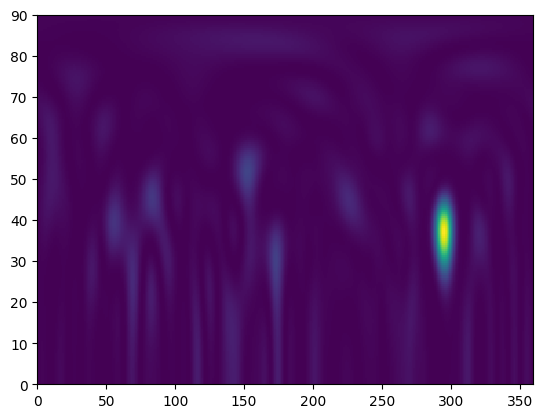

At time instant 0.32768: o = 295, f = 37.5.


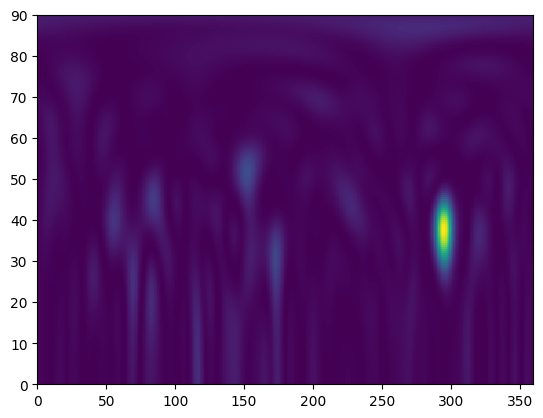

At time instant 0.36864: o = 161, f = 89.5.


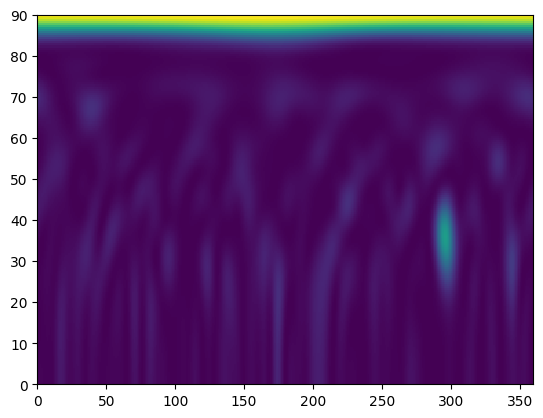

At time instant 0.4096: o = 296, f = 39.5.


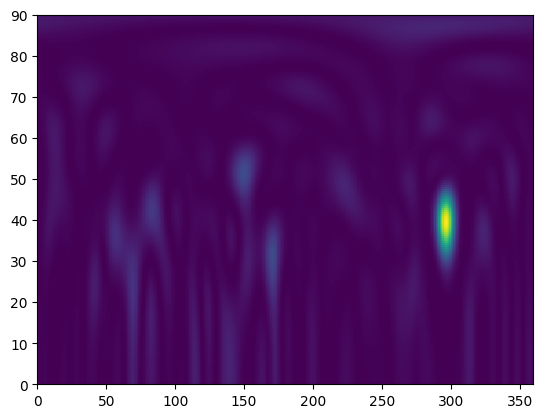

At time instant 0.45056: o = 296, f = 39.0.


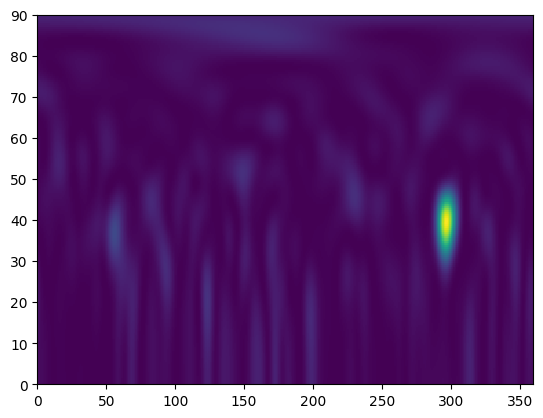

At time instant 0.49152: o = 296, f = 40.0.


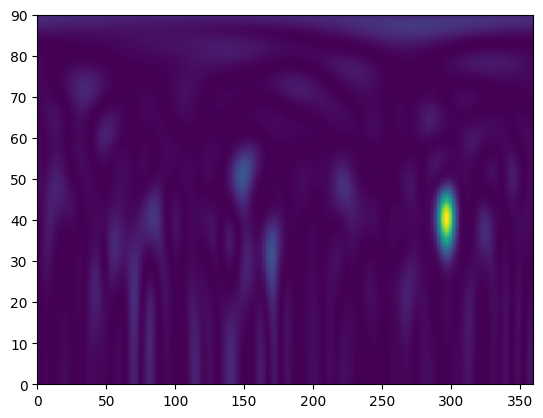

At time instant 0.53248: o = 297, f = 42.0.


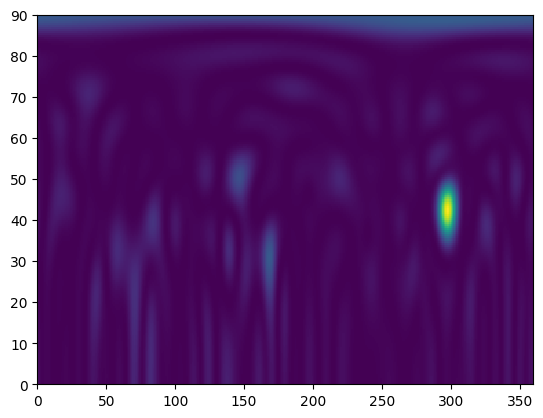

At time instant 0.57344: o = 297, f = 41.5.


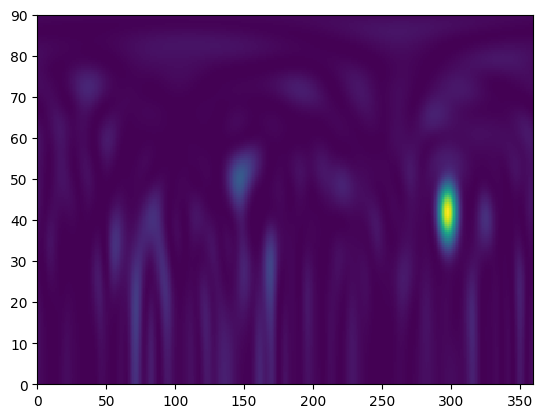

At time instant 0.6144: o = 298, f = 42.5.


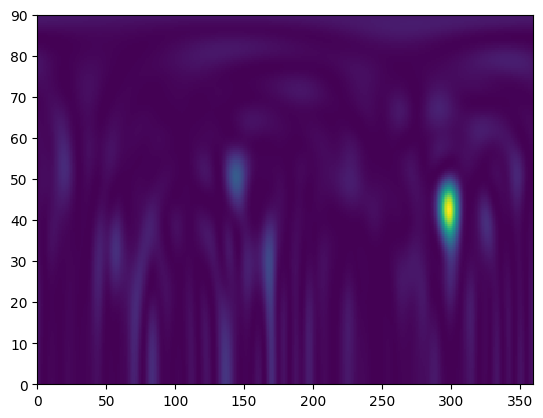

At time instant 0.65536: o = 299, f = 41.0.


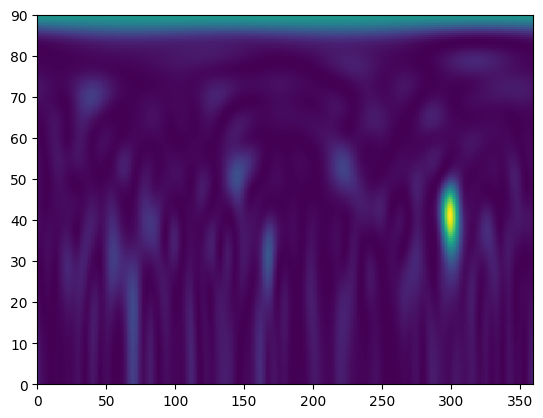

At time instant 0.69632: o = 299, f = 40.5.


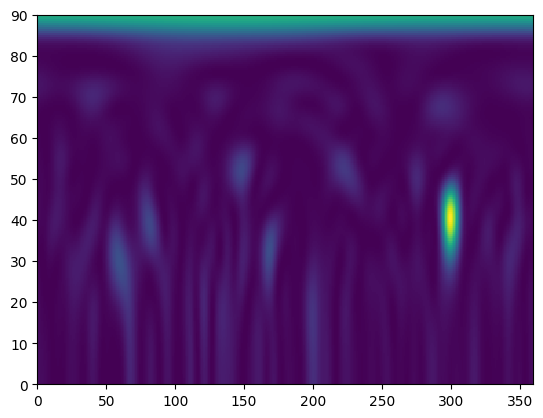

At time instant 0.73728: o = 299, f = 42.5.


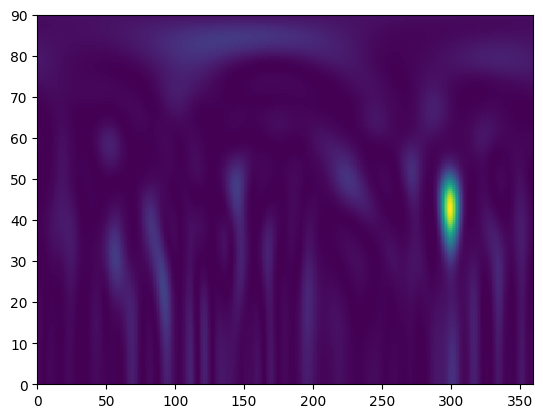

At time instant 0.77824: o = 300, f = 42.5.


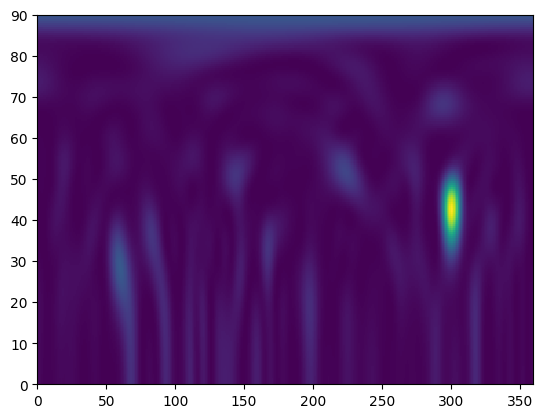

At time instant 0.8192: o = 63, f = 88.5.


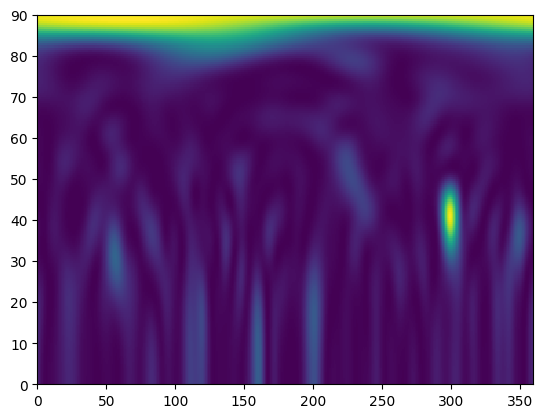

At time instant 0.86016: o = 302, f = 44.0.


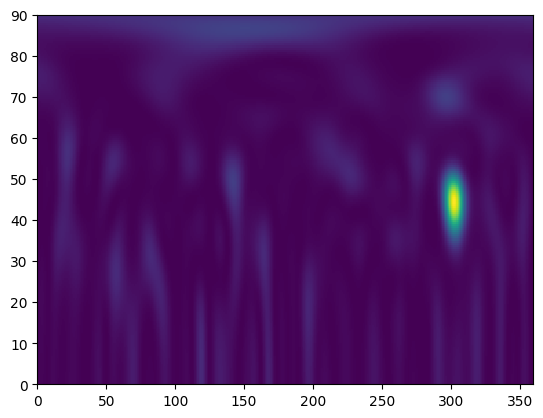

At time instant 0.90112: o = 301, f = 45.0.


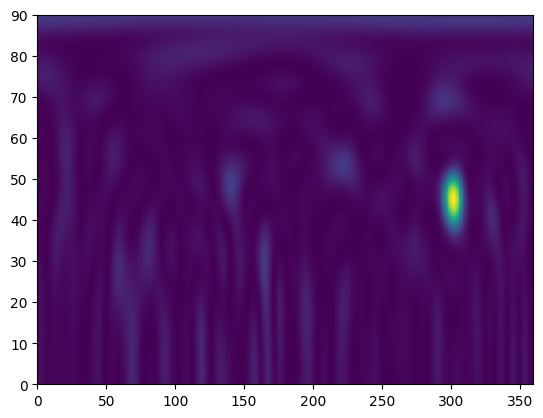

At time instant 0.94208: o = 315, f = 89.5.


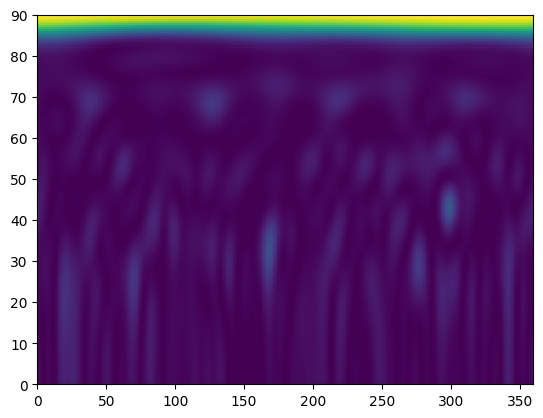

At time instant 0.98304: o = 302, f = 45.0.


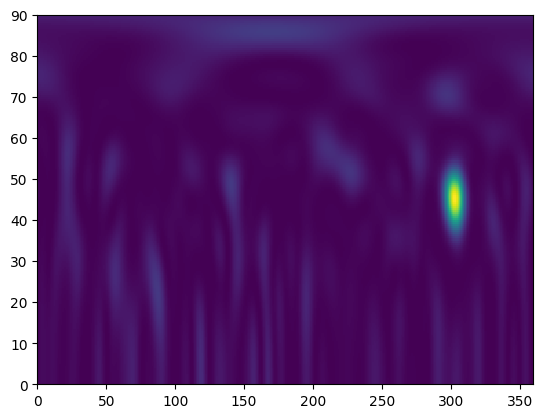

At time instant 1.024: o = 303, f = 45.5.


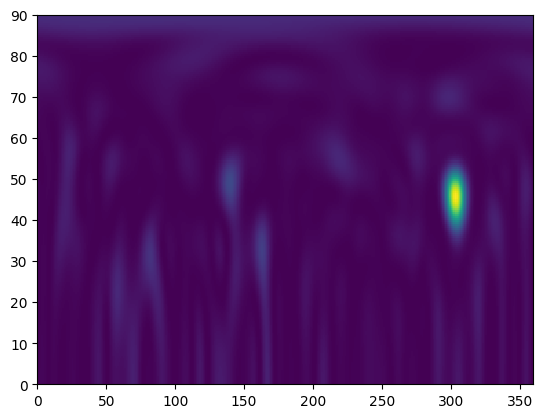

At time instant 1.06496: o = 305, f = 46.5.


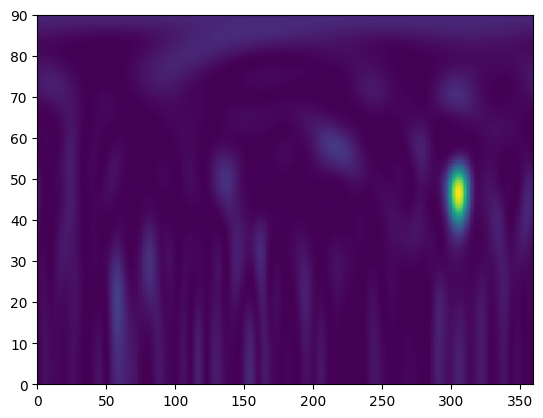

At time instant 1.10592: o = 304, f = 46.0.


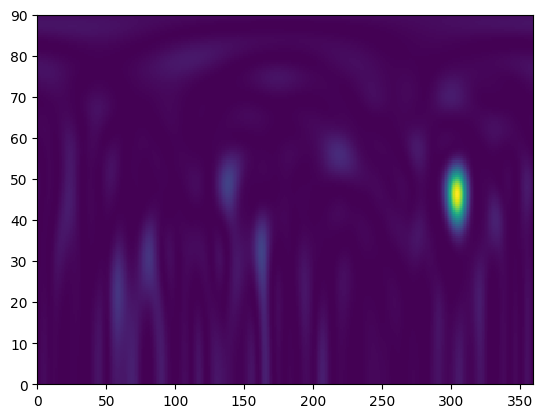

At time instant 1.14688: o = 305, f = 46.0.


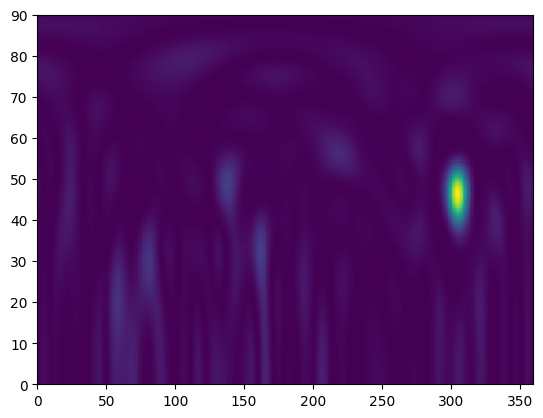

At time instant 1.18784: o = 305, f = 46.0.


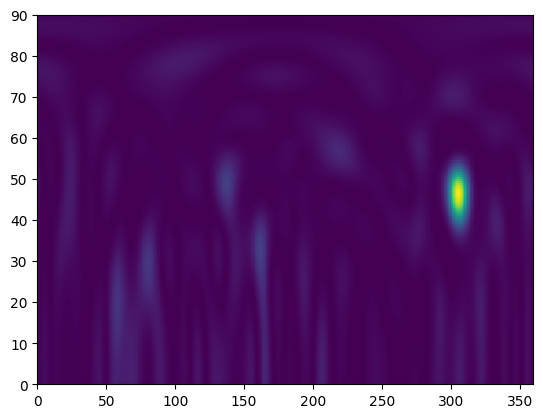

At time instant 1.2288: o = 304, f = 46.0.


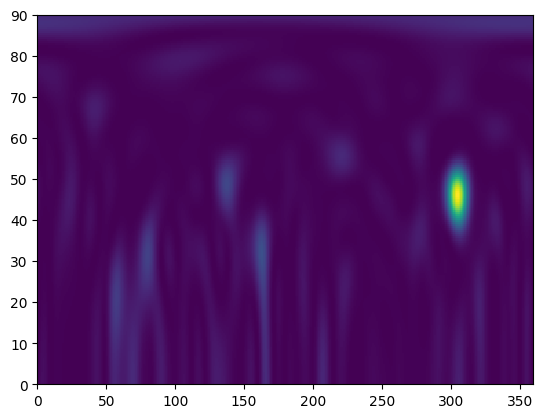

At time instant 1.26976: o = 306, f = 46.5.


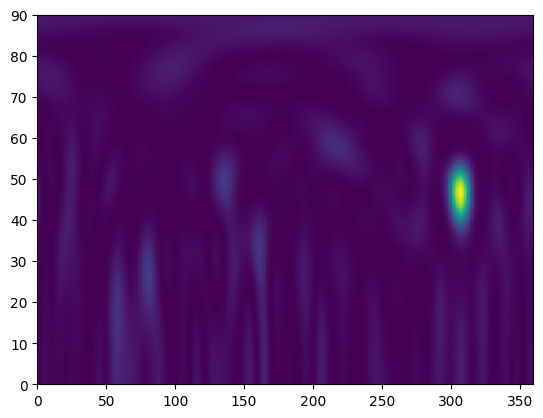

At time instant 1.31072: o = 305, f = 43.5.


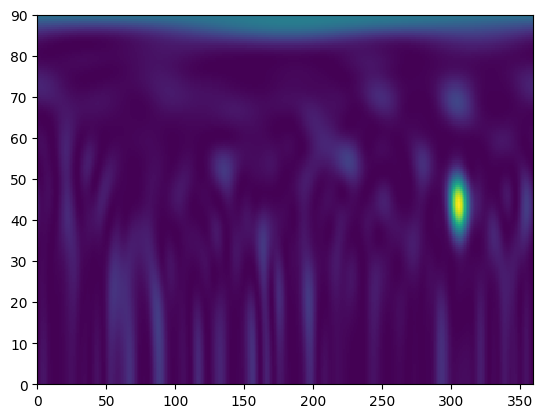

At time instant 1.35168: o = 308, f = 48.0.


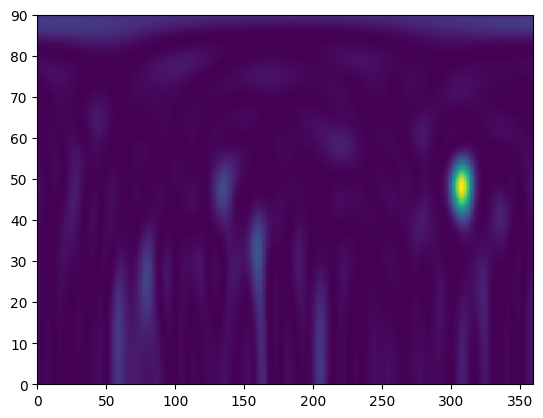

At time instant 1.39264: o = 309, f = 48.0.


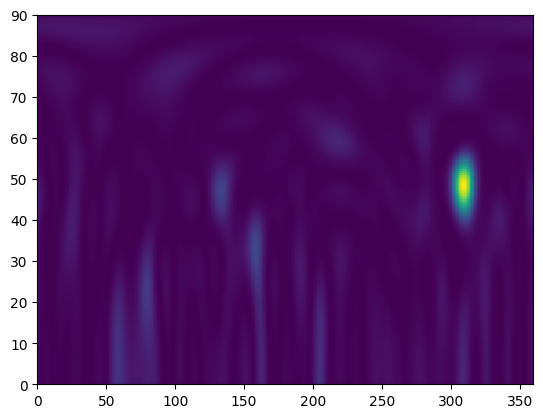

At time instant 1.4336: o = 311, f = 49.5.


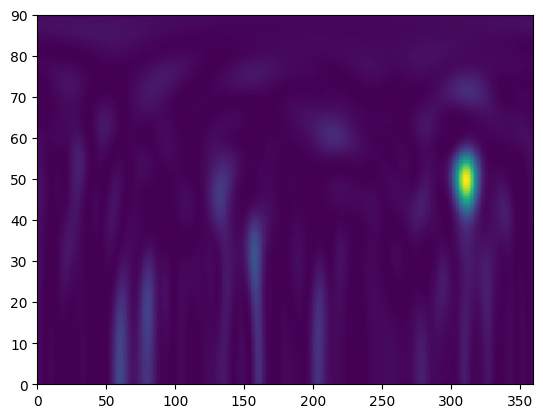

At time instant 1.47456: o = 311, f = 48.5.


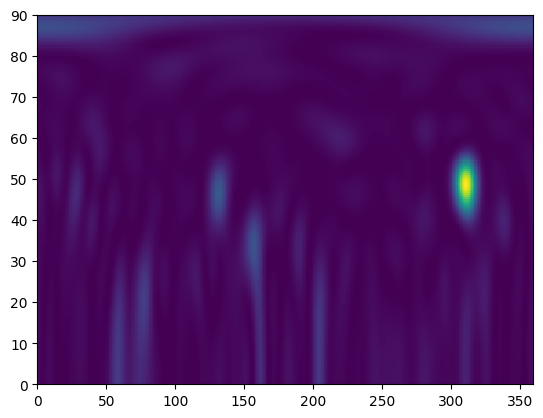

At time instant 1.51552: o = 331, f = 88.5.


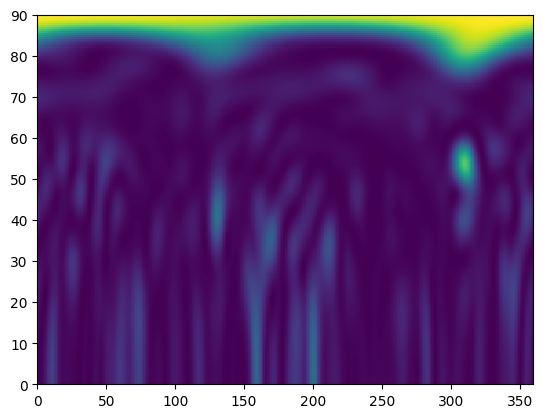

At time instant 1.55648: o = 312, f = 54.5.


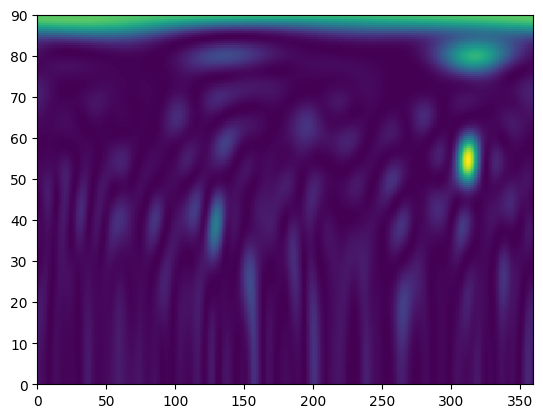

At time instant 1.59744: o = 184, f = 89.5.


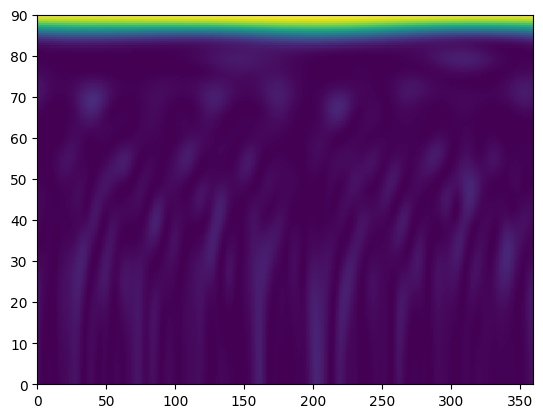

At time instant 1.6384: o = 273, f = 89.5.


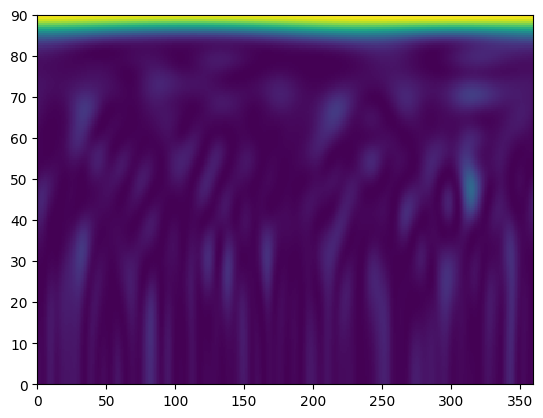

At time instant 1.67936: o = 315, f = 49.5.


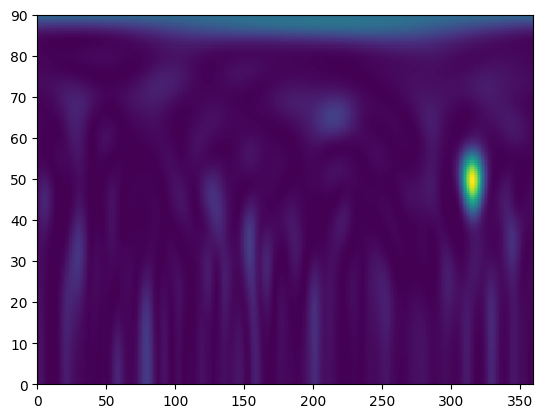

At time instant 1.72032: o = 190, f = 89.0.


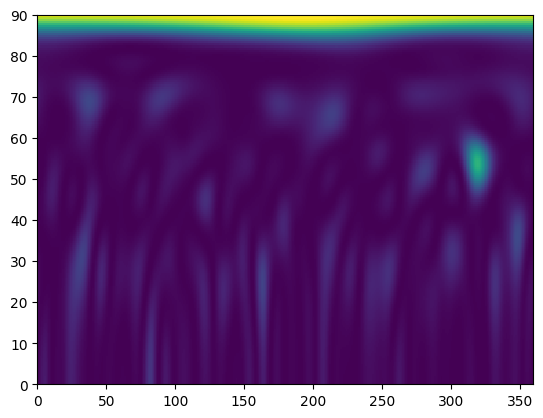

At time instant 1.76128: o = 316, f = 52.0.


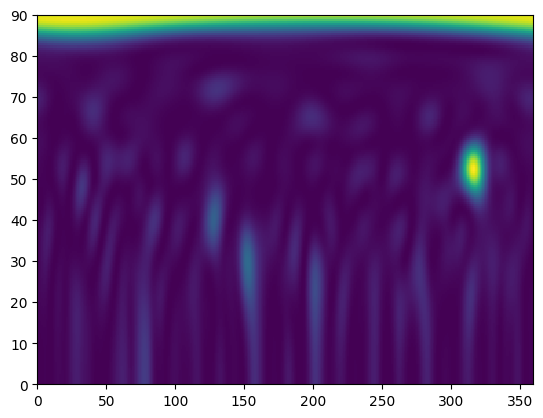

At time instant 1.80224: o = 318, f = 52.0.


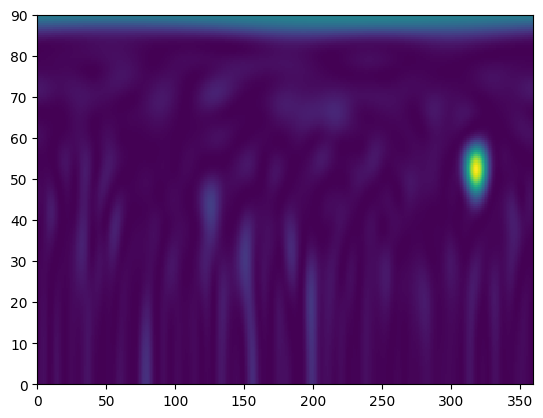

At time instant 1.8432: o = 321, f = 53.0.


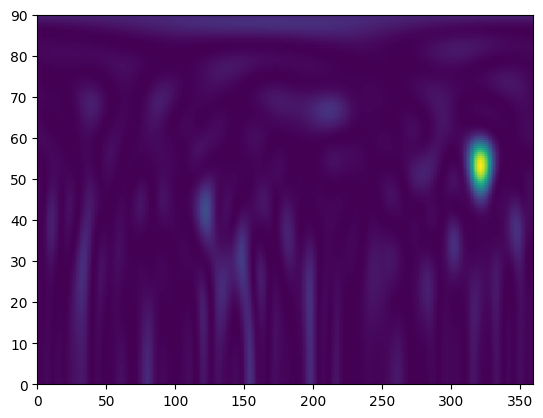

At time instant 1.88416: o = 324, f = 55.5.


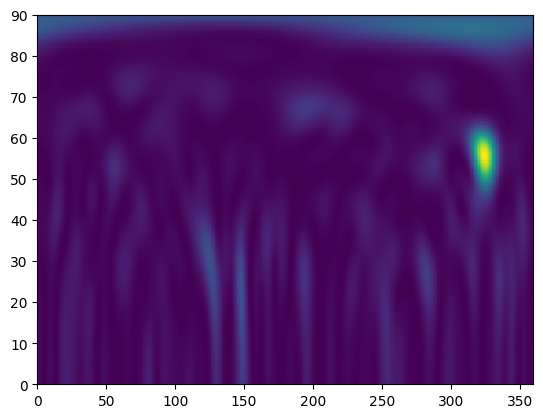

At time instant 1.92512: o = 322, f = 54.5.


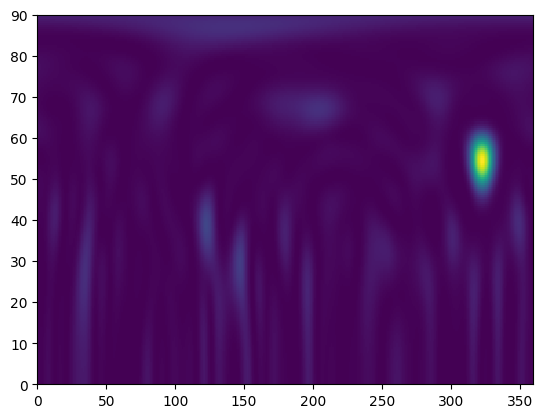

At time instant 1.96608: o = 324, f = 54.5.


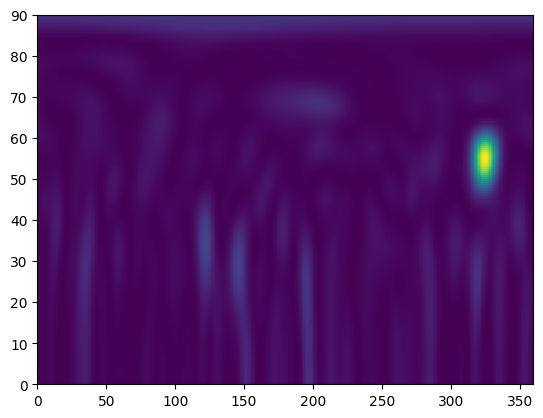

At time instant 2.00704: o = 322, f = 54.5.


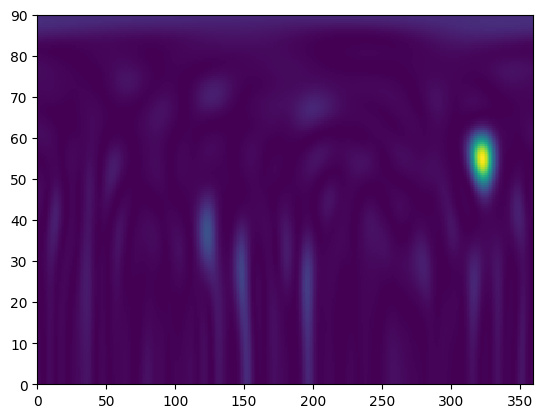

At time instant 2.048: o = 325, f = 54.5.


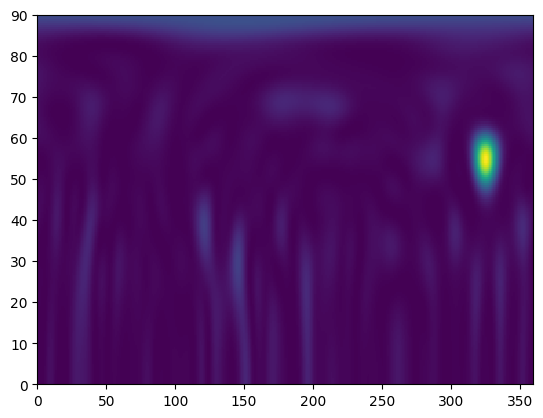

At time instant 2.08896: o = 326, f = 55.5.


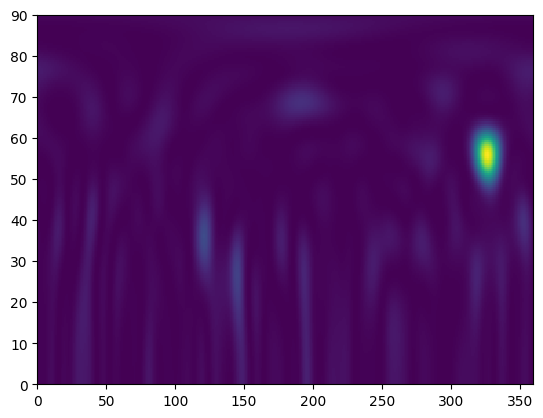

At time instant 2.12992: o = 337, f = 88.5.


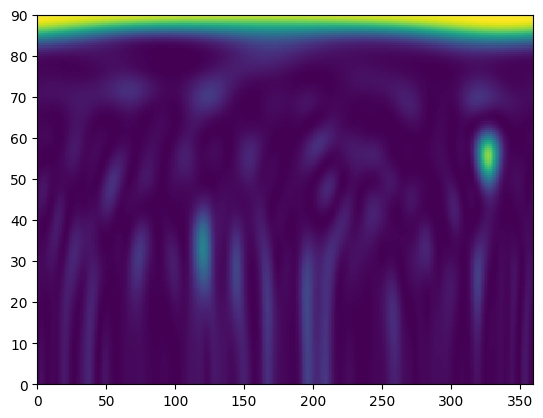

At time instant 2.17088: o = 87, f = 88.0.


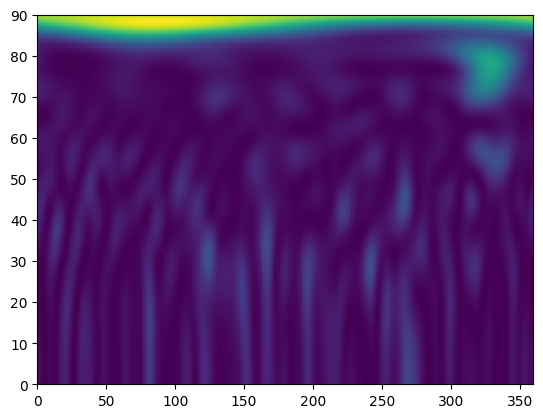

At time instant 2.21184: o = 331, f = 56.5.


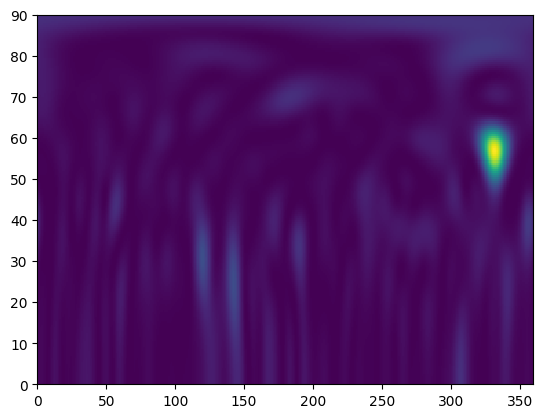

At time instant 2.2528: o = 334, f = 57.5.


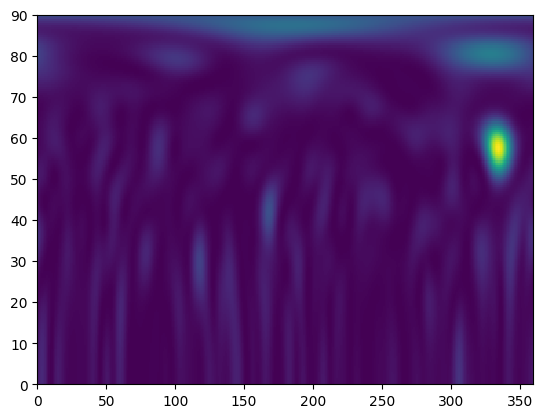

At time instant 2.29376: o = 336, f = 57.5.


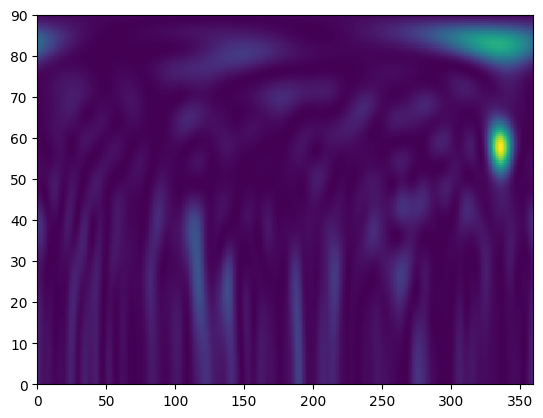

At time instant 2.33472: o = 338, f = 79.5.


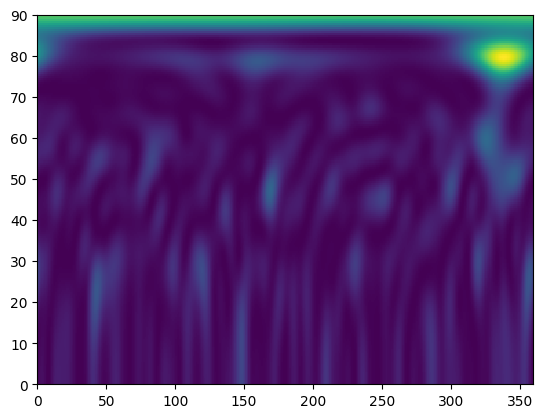

At time instant 2.37568: o = 329, f = 87.0.


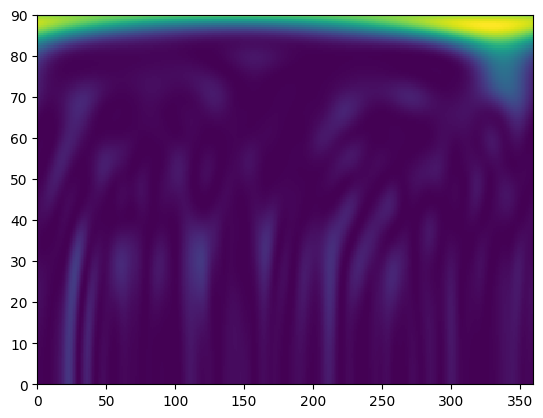

At time instant 2.41664: o = 291, f = 89.0.


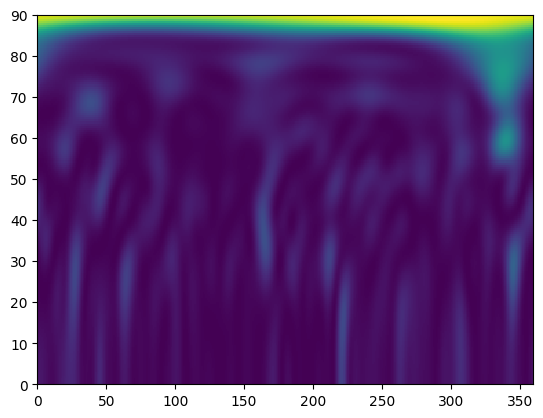

At time instant 2.4576: o = 217, f = 89.5.


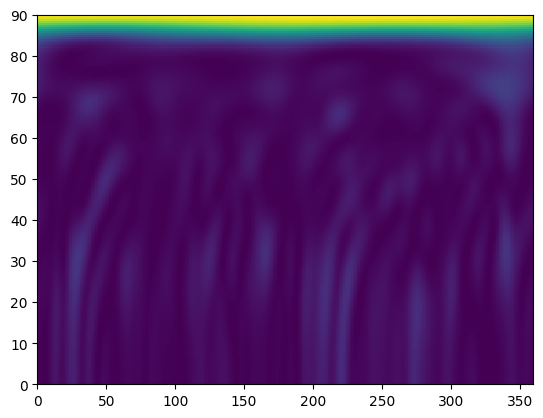

At time instant 2.49856: o = 342, f = 60.0.


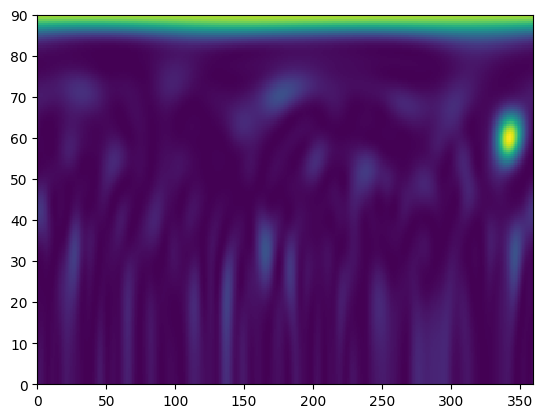

At time instant 2.53952: o = 154, f = 89.5.


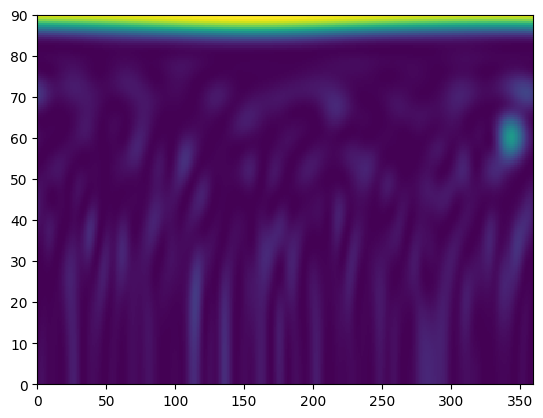

At time instant 2.58048: o = 345, f = 62.5.


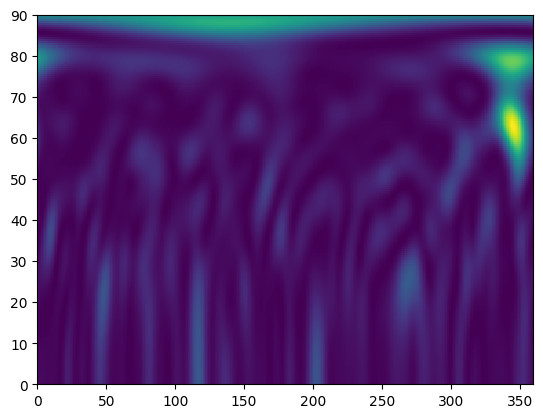

At time instant 2.62144: o = 344, f = 80.0.


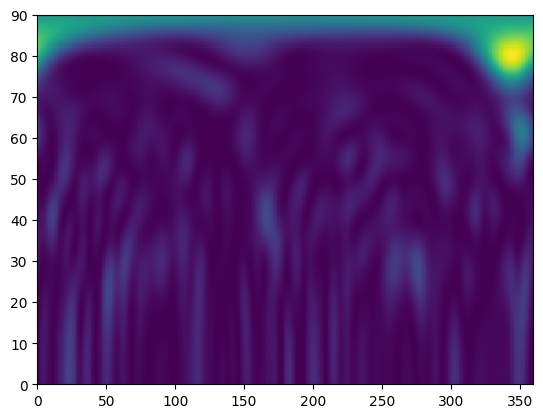

At time instant 2.6624: o = 349, f = 61.5.


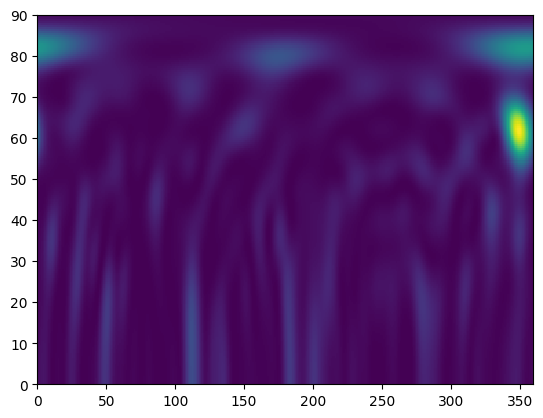

At time instant 2.70336: o = 0, f = 89.5.


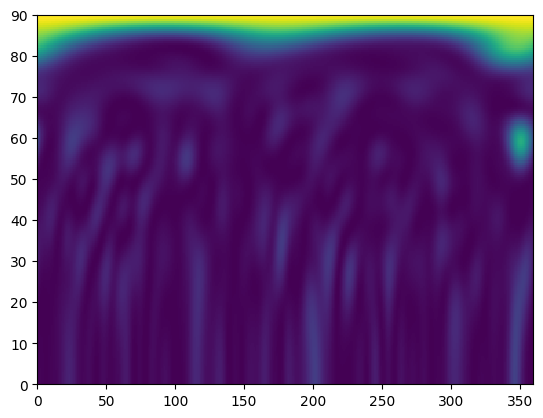

At time instant 2.74432: o = 353, f = 81.5.


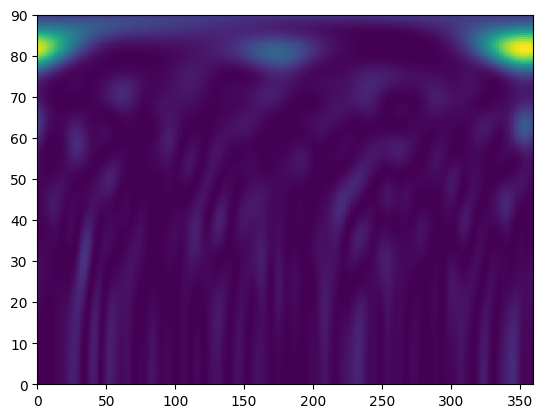

At time instant 2.78528: o = 352, f = 85.0.


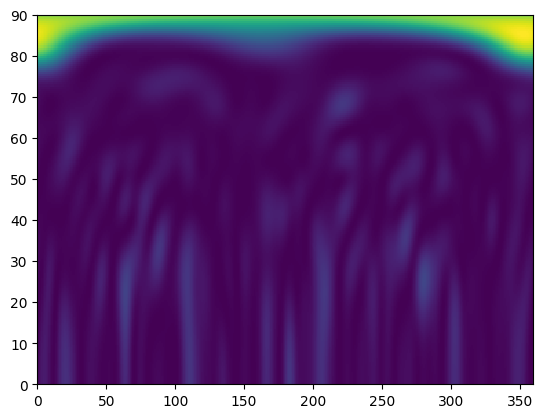

At time instant 2.82624: o = 357, f = 62.0.


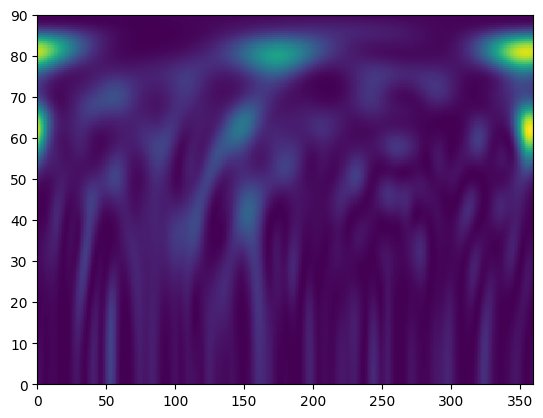

At time instant 2.8672: o = 358, f = 82.5.


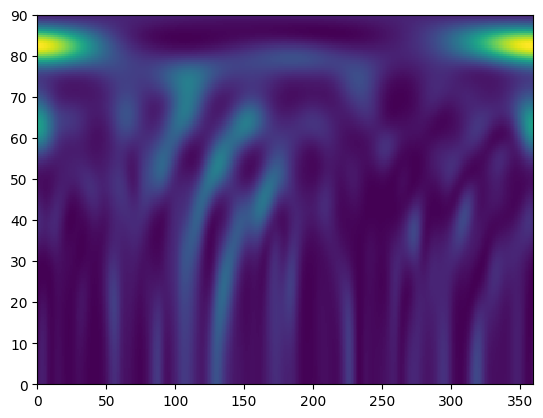

At time instant 2.90816: o = 359, f = 64.0.


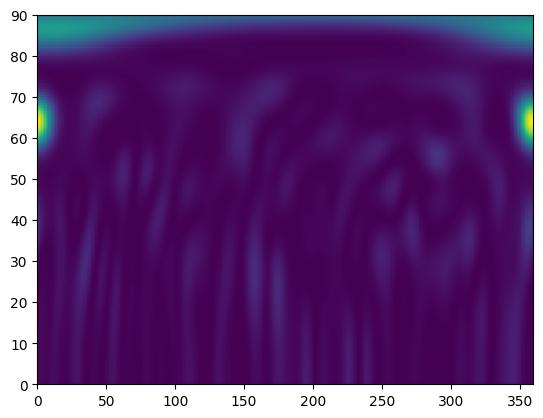

At time instant 2.94912: o = 13, f = 89.0.


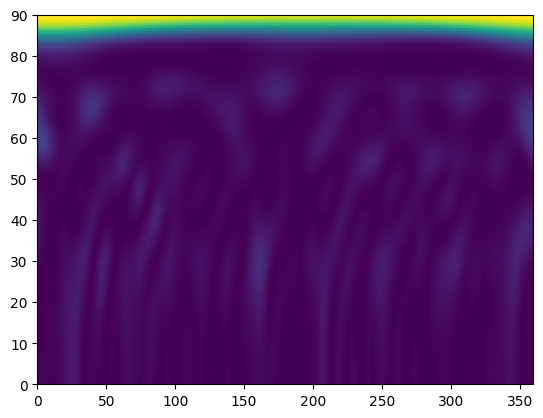

At time instant 2.99008: o = 3, f = 57.5.


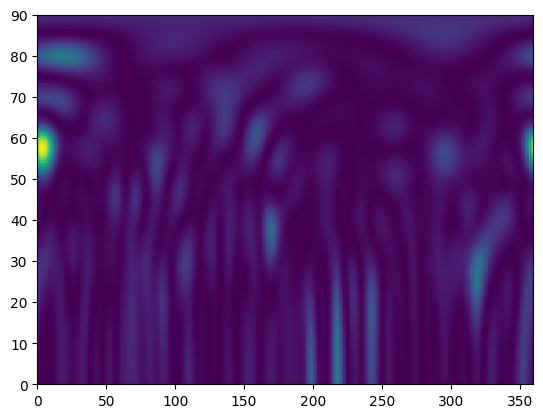

At time instant 3.03104: o = 6, f = 61.0.


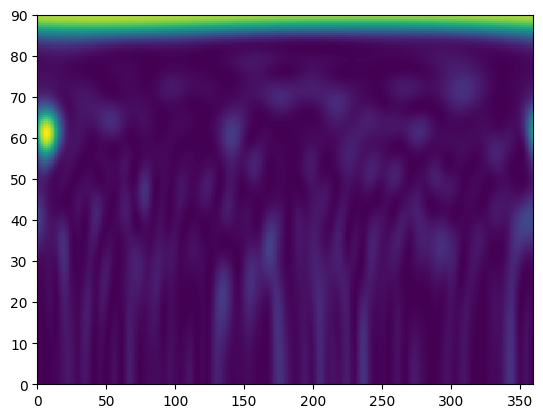

At time instant 3.072: o = 355, f = 89.0.


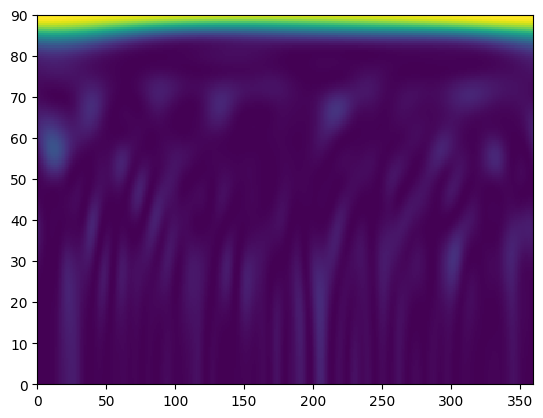

At time instant 3.11296: o = 345, f = 89.0.


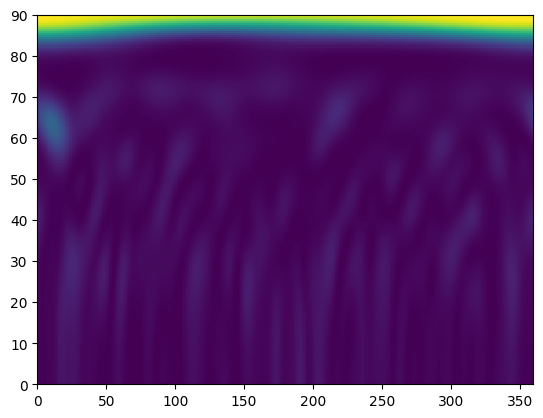

At time instant 3.15392: o = 1, f = 87.5.


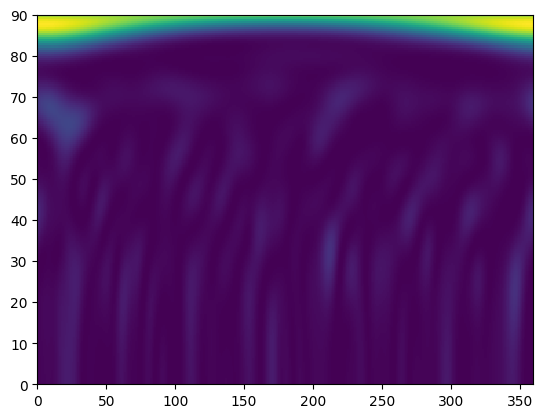

At time instant 3.19488: o = 224, f = 89.5.


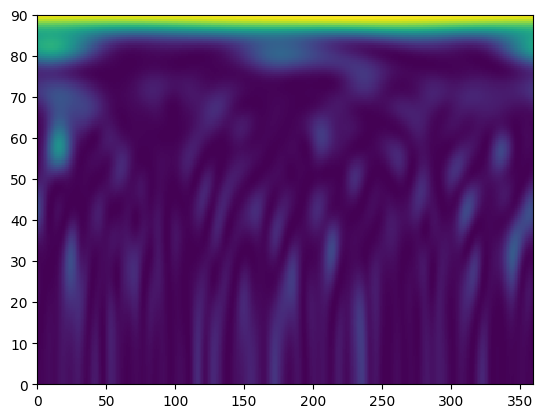

At time instant 3.23584: o = 193, f = 87.0.


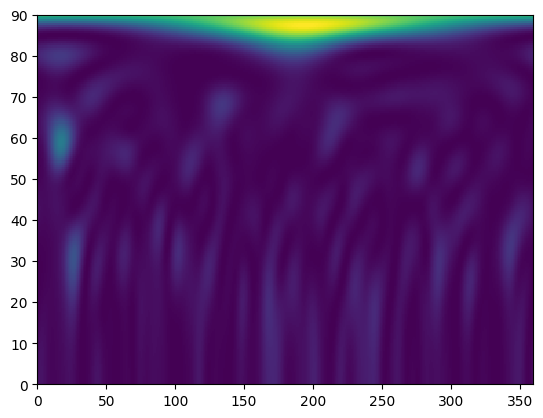

At time instant 3.2768: o = 18, f = 60.0.


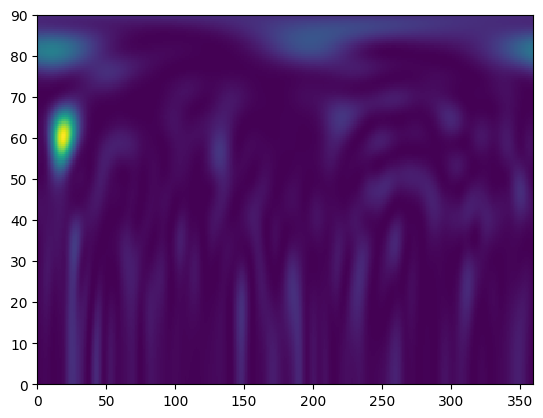

At time instant 3.31776: o = 22, f = 59.0.


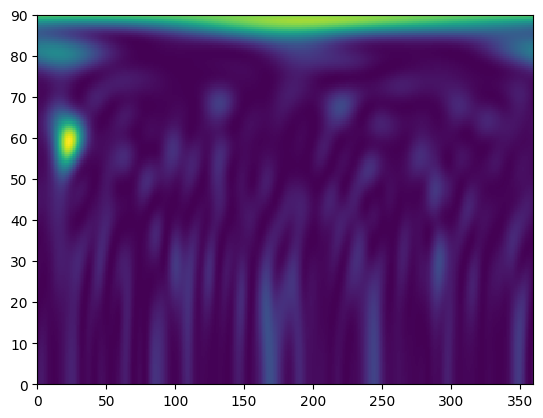

At time instant 3.35872: o = 19, f = 88.5.


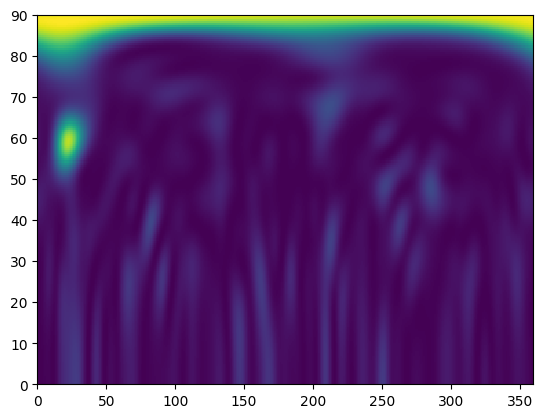

At time instant 3.39968: o = 17, f = 88.5.


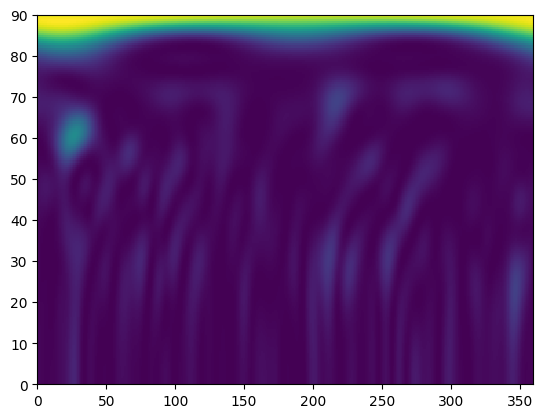

At time instant 3.44064: o = 218, f = 88.5.


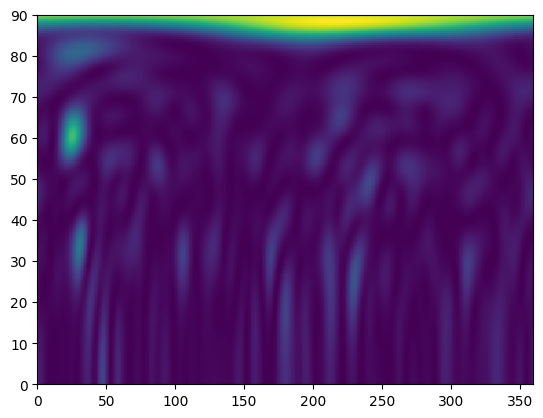

At time instant 3.4816: o = 26, f = 58.0.


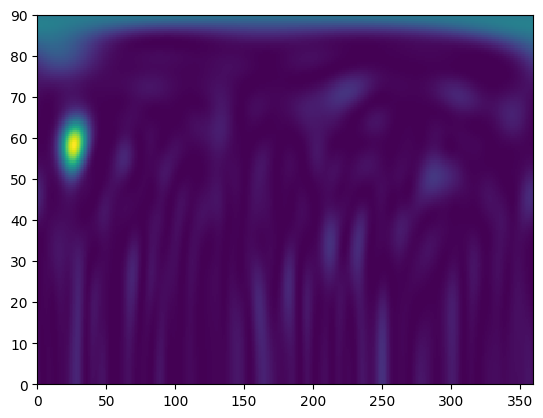

At time instant 3.52256: o = 26, f = 58.0.


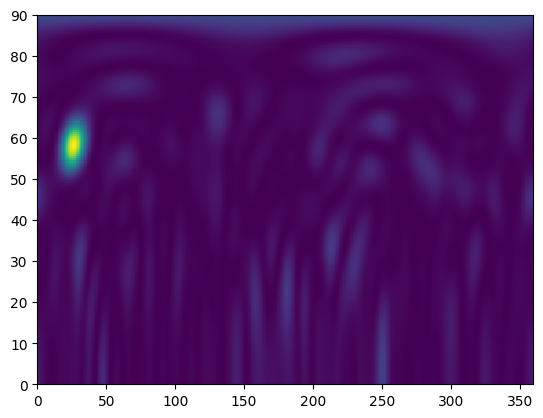

At time instant 3.56352: o = 26, f = 89.5.


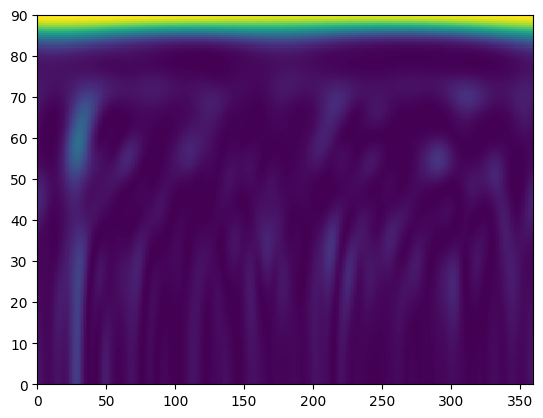

At time instant 3.60448: o = 257, f = 89.5.


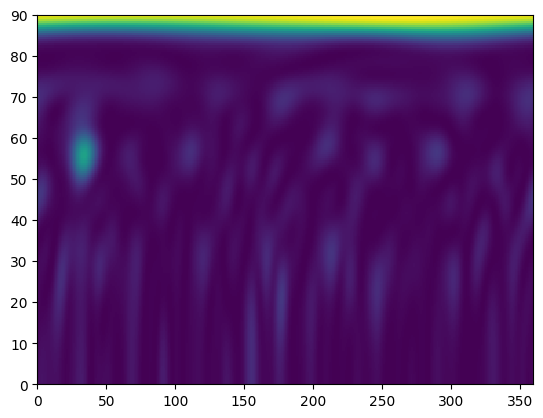

At time instant 3.64544: o = 33, f = 56.5.


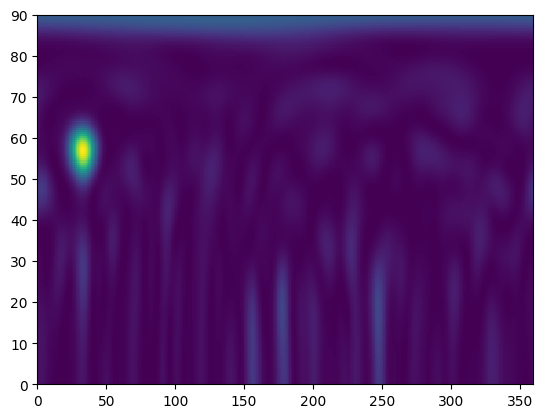

At time instant 3.6864: o = 33, f = 56.5.


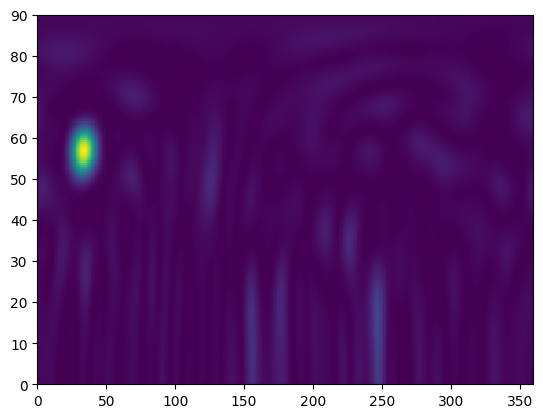

At time instant 3.72736: o = 34, f = 56.0.


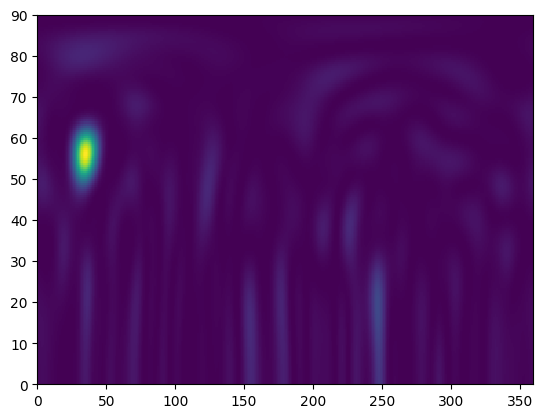

At time instant 3.76832: o = 36, f = 55.0.


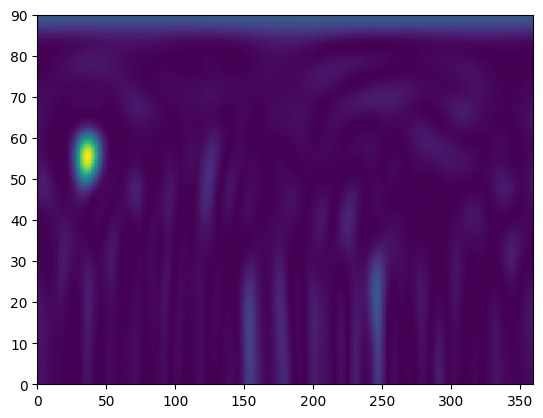

At time instant 3.80928: o = 38, f = 55.5.


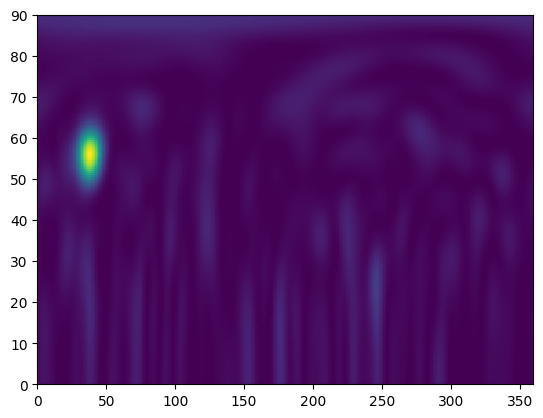

At time instant 3.85024: o = 40, f = 55.0.


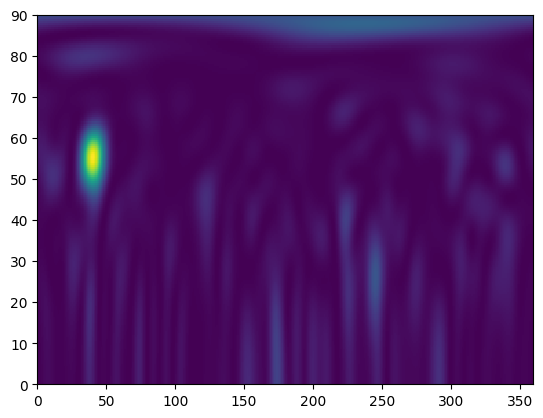

At time instant 3.8912: o = 41, f = 54.5.


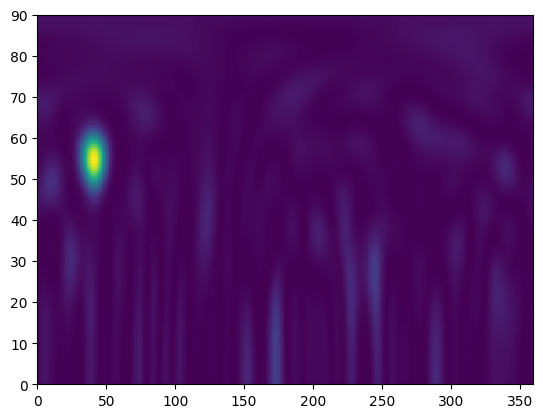

At time instant 3.93216: o = 39, f = 55.0.


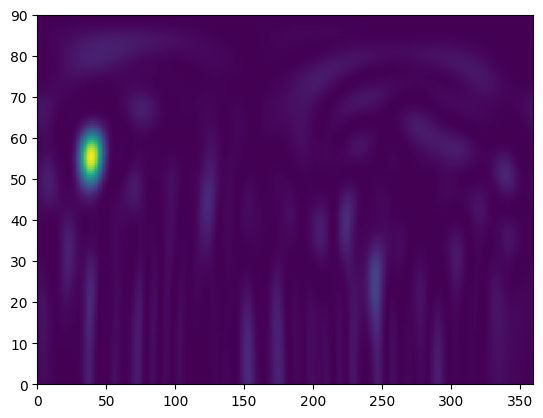

At time instant 3.97312: o = 75, f = 89.0.


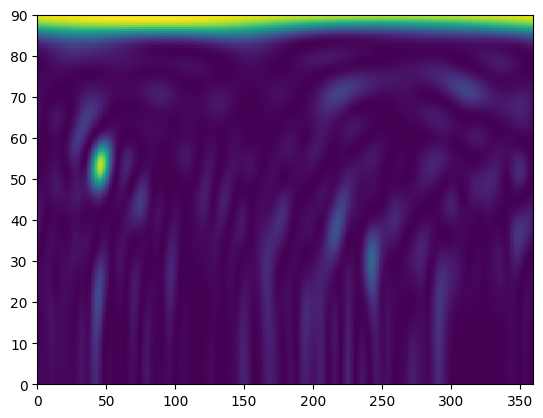

At time instant 4.01408: o = 29, f = 89.5.


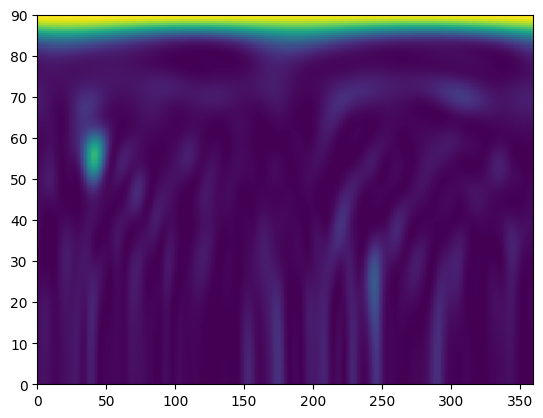

At time instant 4.05504: o = 122, f = 89.5.


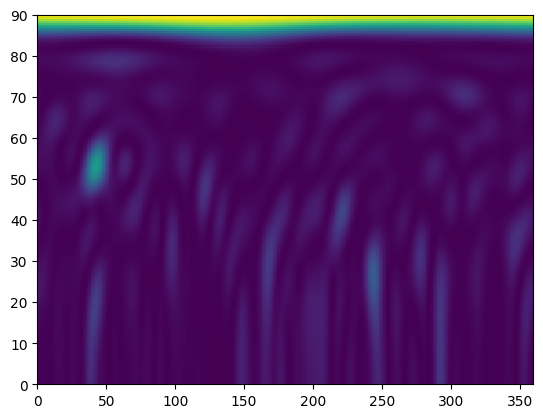

At time instant 4.096: o = 44, f = 52.5.


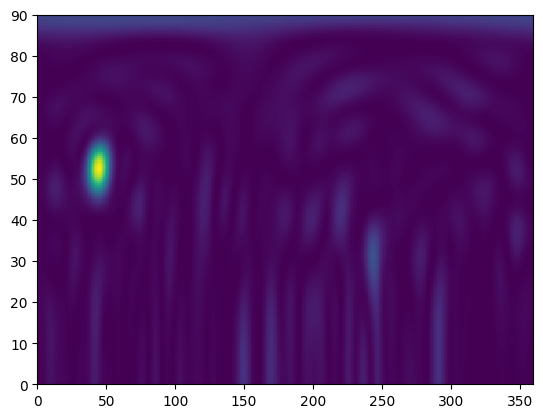

At time instant 4.13696: o = 46, f = 52.0.


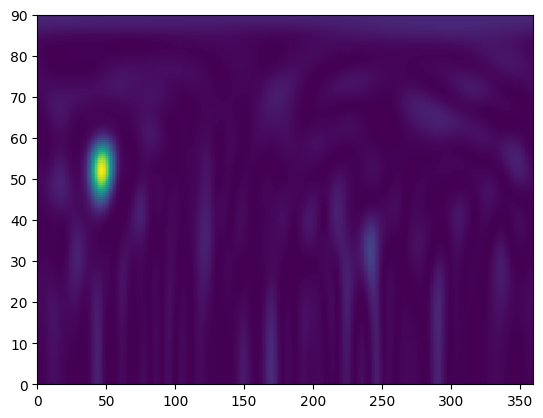

At time instant 4.17792: o = 47, f = 51.0.


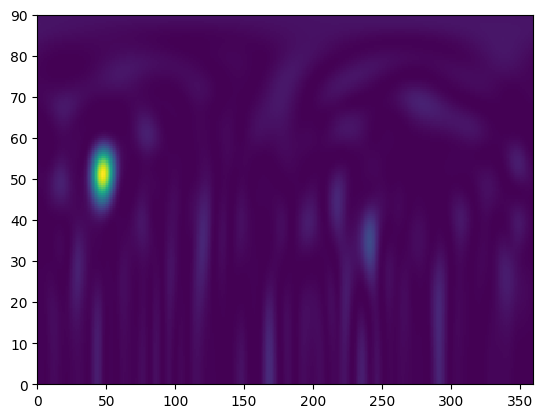

At time instant 4.21888: o = 57, f = 89.5.


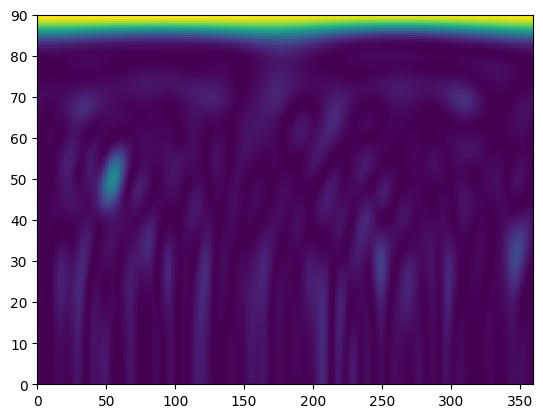

At time instant 4.25984: o = 48, f = 51.0.


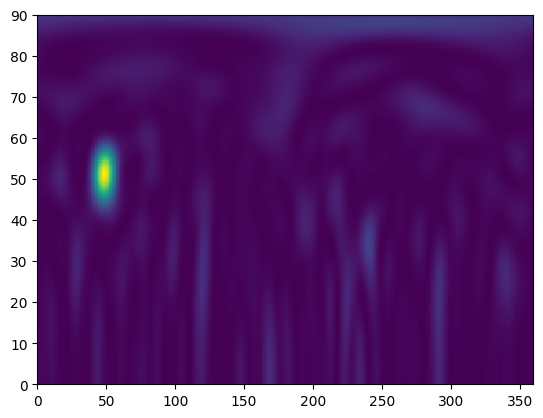

At time instant 4.3008: o = 237, f = 89.5.


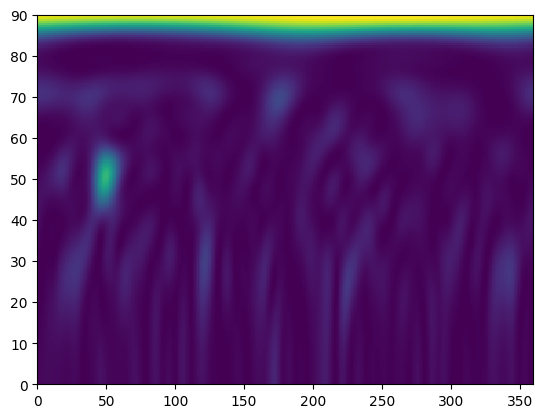

At time instant 4.34176: o = 50, f = 47.0.


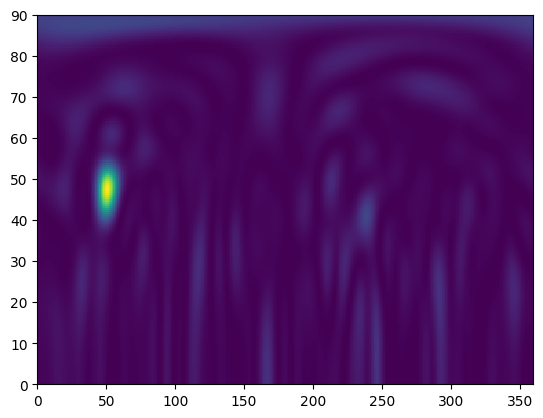

At time instant 4.38272: o = 52, f = 49.0.


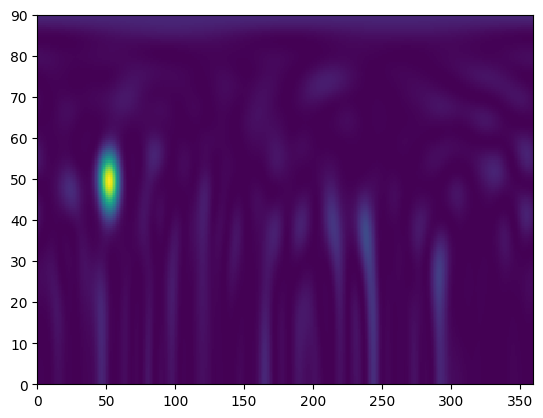

At time instant 4.42368: o = 51, f = 48.5.


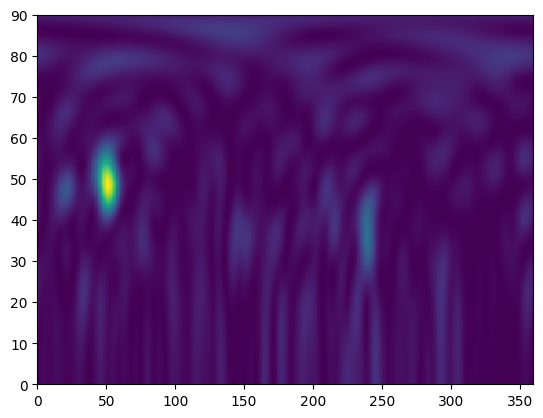

At time instant 4.46464: o = 54, f = 50.5.


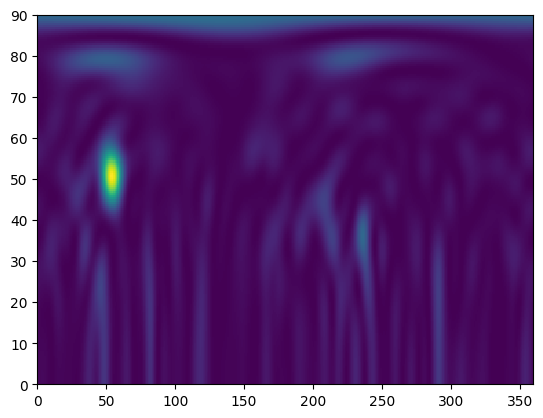

At time instant 4.5056: o = 55, f = 46.5.


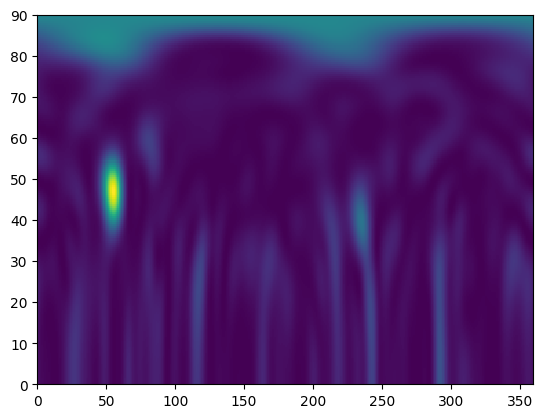

At time instant 4.54656: o = 55, f = 48.5.


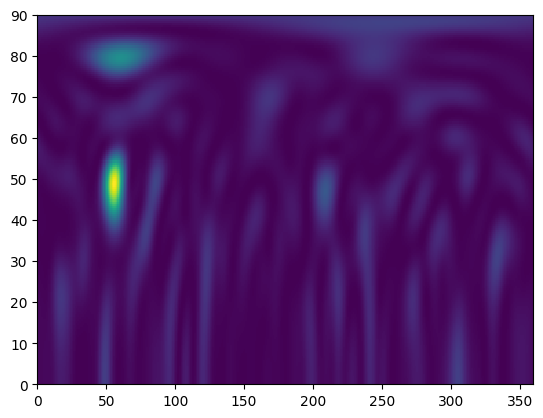

At time instant 4.58752: o = 57, f = 44.5.


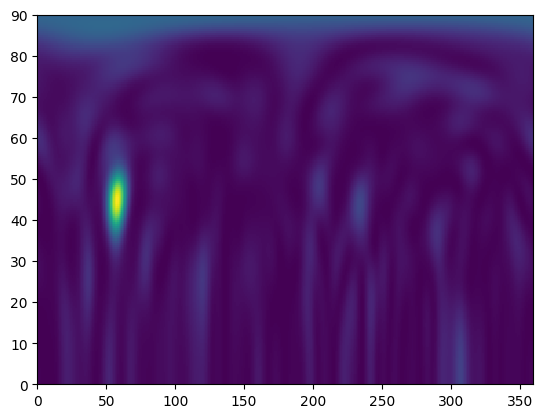

At time instant 4.62848: o = 280, f = 89.5.


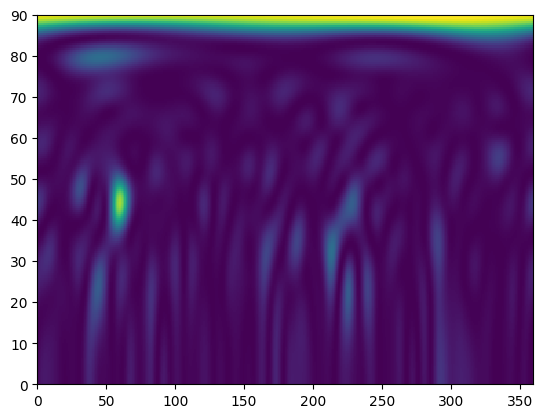

At time instant 4.66944: o = 56, f = 47.5.


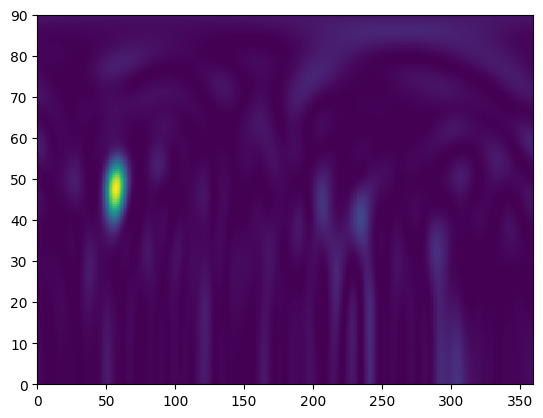

At time instant 4.7104: o = 59, f = 44.0.


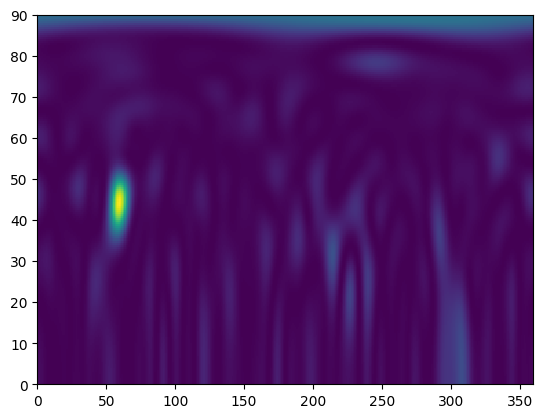

At time instant 4.75136: o = 58, f = 44.0.


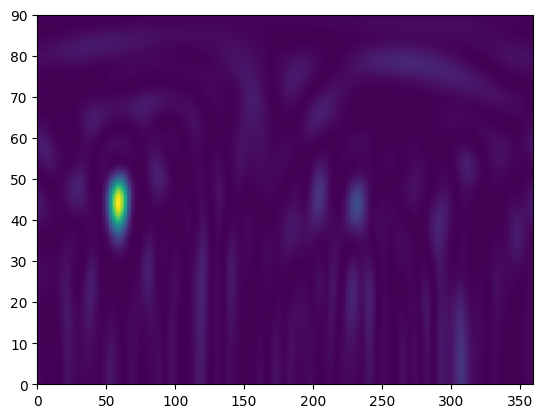

At time instant 4.79232: o = 58, f = 41.0.


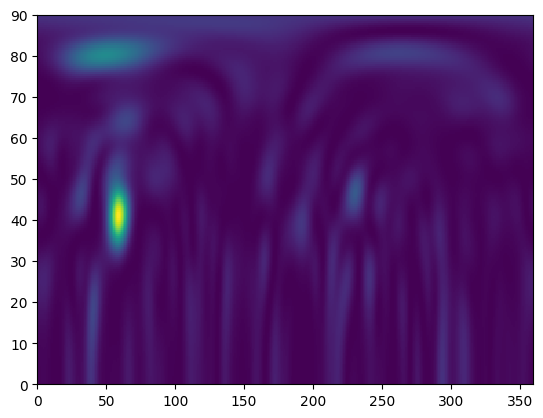

At time instant 4.83328: o = 60, f = 43.0.


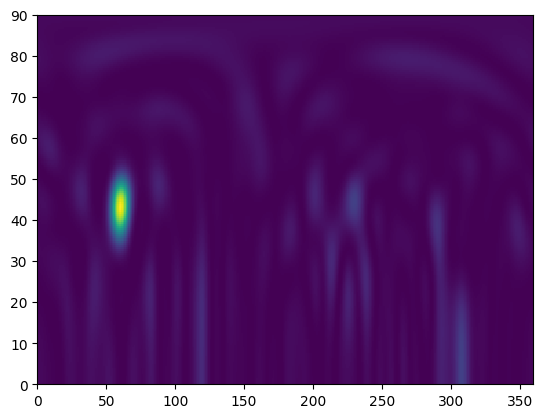

At time instant 4.87424: o = 60, f = 42.5.


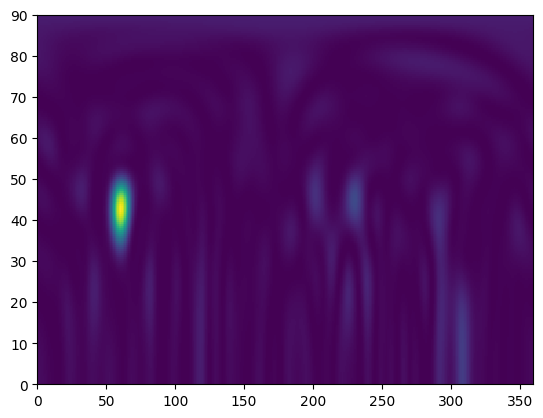

At time instant 4.9152: o = 61, f = 42.0.


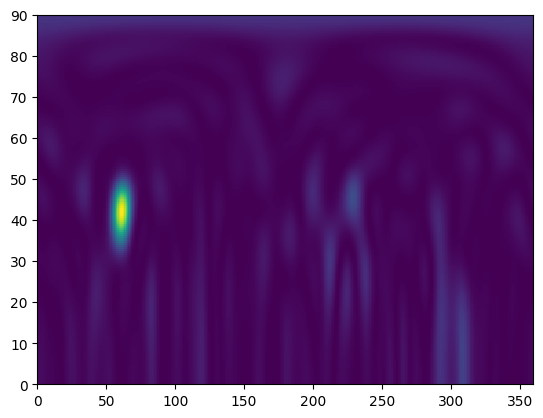

In [15]:
#Apply the beamforming fomrula

for i in range(0, len(p) - wind, wind//2):
    
    p_fft = np.fft.fft(p[i:i+wind], axis=0) 

    p_fft = p_fft[n]
    p_star = np.conj(p_fft) 

    aux = np.outer(p_fft, p_star)

    for j in range(len(grid)):
        g_star = np.conj(grid[j].g)
        g_norm_squared = (np.linalg.norm(grid[j].g))**2
        aux2 = (aux.T @ g_star)
        aux3 = aux2 @ grid[j].g
        grid[j].beam = (aux3/g_norm_squared)
    
    beam_map = np.zeros((len(y_axis)-1, len(x_axis)-1))
    index = 0

    for j in range(len(y_axis)-1):
        for k in range(len(x_axis)-1):
            beam_map[j][k] = grid[index].beam
            index += 1
    
    #Printing
    max_value = 0
    x_max = 0
    y_max = 0
    for j in range(len(grid)):
        if grid[j].beam > max_value:
            x_max = grid[j].theta
            y_max = grid[j].phi
            max_value = grid[j].beam
        
    print(f"At time instant {i/50000}: o = {x_max}, f = {y_max}.")      

    #Plotting    
        
    fig, ax = plt.subplots()
    ax.pcolormesh(X, Y, beam_map)
    #fig.canvas.manager.set_window_title(f"Time instant {0.00002*i}")
    #print(beam_map)
    plt.show()
